<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**
3. **[Linear Discriminant Analysis (LDA)](#lda)**

**Import the required libraries**

In [1]:
# write your code here
import pandas as pd


#### Load the csv file

In [2]:
# write your code here

df = pd.read_csv('Ind_Climate_RainPred.csv')

df.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# write your code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464 entries, 0 to 10463
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_min      10464 non-null  float64
 1   Temperature_max      10464 non-null  float64
 2   WindSpeedAt3am       10464 non-null  int64  
 3   WindSpeedAt10am      10464 non-null  int64  
 4   WindSpeedAt6pm       10464 non-null  int64  
 5   HumidityLevelAt10am  10464 non-null  int64  
 6   HumidityAt6pm        10464 non-null  int64  
 7   PressureAt10am       10464 non-null  float64
 8   PressureAt6pm        10464 non-null  float64
 9   TemperatureAt10am    10464 non-null  float64
 10  TemperatureAt6pm     10464 non-null  float64
 11  WillRainTomorrow?    10464 non-null  object 
dtypes: float64(6), int64(5), object(1)
memory usage: 981.1+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# write your code here

df.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# write your code here
df['WillRainTomorrow?'].value_counts()

WillRainTomorrow?
No     5464
Yes    5000
Name: count, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# write your code here
df.isnull().sum()


Temperature_min        0
Temperature_max        0
WindSpeedAt3am         0
WindSpeedAt10am        0
WindSpeedAt6pm         0
HumidityLevelAt10am    0
HumidityAt6pm          0
PressureAt10am         0
PressureAt6pm          0
TemperatureAt10am      0
TemperatureAt6pm       0
WillRainTomorrow?      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

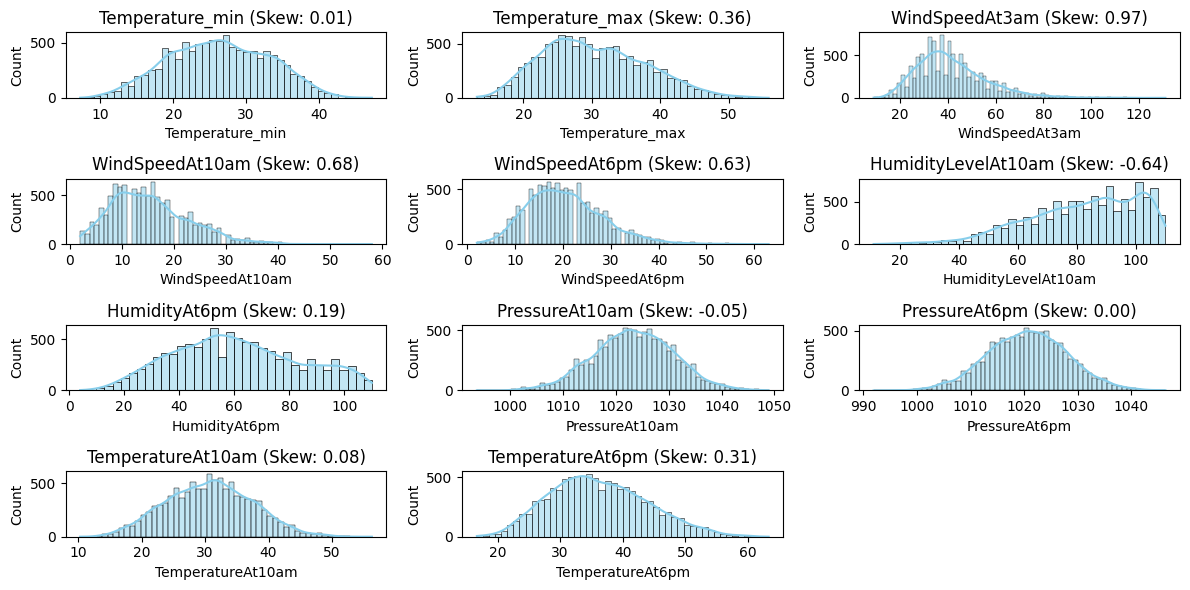

In [7]:
# write your code here


import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


# Drop target column to isolate independent variables
x = df.drop(columns=['WillRainTomorrow?'])

# Plot histograms for all independent variables
plt.figure(figsize=(12, 6))
for i, column in enumerate(x.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'{column} (Skew: {df[column].skew():.2f})')
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from pyparsing import col
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(df.drop('WillRainTomorrow?', axis = 1))

scaled_df = pd.DataFrame(scaler, columns = df.drop('WillRainTomorrow?', axis = 1).columns)



print('Mean: \n', round(scaled_df.mean()), '\n')

print('Standard Deviation: \n', round(scaled_df.std()))
# df_scaled = pd.concat([X_scaled_df, df['WillRainTomorrow?']], axis=1)

# df_scaled.head()

Mean: 
 Temperature_min       -0.0
Temperature_max       -0.0
WindSpeedAt3am         0.0
WindSpeedAt10am        0.0
WindSpeedAt6pm        -0.0
HumidityLevelAt10am   -0.0
HumidityAt6pm         -0.0
PressureAt10am         0.0
PressureAt6pm          0.0
TemperatureAt10am     -0.0
TemperatureAt6pm      -0.0
dtype: float64 

Standard Deviation: 
 Temperature_min        1.0
Temperature_max        1.0
WindSpeedAt3am         1.0
WindSpeedAt10am        1.0
WindSpeedAt6pm         1.0
HumidityLevelAt10am    1.0
HumidityAt6pm          1.0
PressureAt10am         1.0
PressureAt6pm          1.0
TemperatureAt10am      1.0
TemperatureAt6pm       1.0
dtype: float64


<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# write your code here
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)
print('components_ \n', pca.components_)
print()
print('explained_variance_ \n',pca.explained_variance_)
print()
print('explained_variance_ratio_ \n', pca.explained_variance_ratio_)

components_ 
 [[ 0.33781785  0.40087506  0.26666777  0.14561644  0.17812567 -0.3093895
  -0.24976325 -0.27406409 -0.28205479  0.38706309  0.37221806]
 [ 0.03549082  0.28485778 -0.38120744 -0.32320401 -0.3671682  -0.14948994
  -0.30898812  0.40143674  0.36137641  0.15069408  0.31737997]
 [ 0.35858565  0.10425574 -0.1908883  -0.33544556 -0.34917199  0.44585592
   0.45624609 -0.25274467 -0.26688296  0.20620235  0.07134515]
 [ 0.42444298 -0.03376955  0.02705605  0.59156622 -0.09189247 -0.03061406
   0.36844966  0.30171211  0.38869691  0.26766507 -0.09554306]
 [ 0.13644818  0.1189962   0.31592881 -0.38842204  0.61597616  0.38031984
   0.09207514  0.3001498   0.27424017  0.06056677  0.12257873]
 [-0.14320347  0.08118397  0.78707893 -0.06004674 -0.55598391  0.06731708
   0.01787154  0.14722646  0.02518643 -0.09685816  0.06436221]
 [-0.03924682  0.15405941 -0.12571969  0.47855507 -0.01913024  0.58995926
  -0.23378475  0.01395408 -0.05866258 -0.35164425  0.44670135]
 [ 0.7102148  -0.11028839  0

In [10]:

import numpy as np


covariance_mat = np.cov(scaled_df.T)



covariance_mat[:5]

array([[ 1.00009557,  0.62986804,  0.2774717 ,  0.19188583,  0.10114221,
        -0.25035675, -0.05795163, -0.3635111 , -0.34036162,  0.71612149,
         0.54811355],
       [ 0.62986804,  1.00009557,  0.23626203, -0.01431146,  0.07161277,
        -0.50728072, -0.55772371, -0.24497184, -0.29854472,  0.76966307,
         0.8658169 ],
       [ 0.2774717 ,  0.23626203,  1.00009557,  0.42037333,  0.57176138,
        -0.27611053, -0.11724591, -0.47841125, -0.47563157,  0.27207988,
         0.17209019],
       [ 0.19188583, -0.01431146,  0.42037333,  1.00009557,  0.33458778,
        -0.31749763, -0.00663469, -0.25165481, -0.18433562,  0.14168084,
        -0.0391036 ],
       [ 0.10114221,  0.07161277,  0.57176138,  0.33458778,  1.00009557,
        -0.19684857, -0.15049059, -0.33940416, -0.30875067,  0.10542863,
         0.04909065]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# write your code here
eigenvalue, eigenvector = np.linalg.eig(covariance_mat)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# write your code here




<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# write your code here
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)

pca.fit(scaled_df)

print('components_ \n', pca.components_)
print()
print('explained_variance_ \n',pca.explained_variance_)
print()
print('explained_variance_ratio_ \n', pca.explained_variance_ratio_)

components_ 
 [[ 0.33781785  0.40087506  0.26666777  0.14561644  0.17812567 -0.3093895
  -0.24976325 -0.27406409 -0.28205479  0.38706309  0.37221806]
 [ 0.03549082  0.28485778 -0.38120744 -0.32320401 -0.3671682  -0.14948994
  -0.30898812  0.40143674  0.36137641  0.15069408  0.31737997]
 [ 0.35858565  0.10425574 -0.1908883  -0.33544556 -0.34917199  0.44585592
   0.45624609 -0.25274467 -0.26688296  0.20620235  0.07134515]
 [ 0.42444298 -0.03376955  0.02705605  0.59156622 -0.09189247 -0.03061406
   0.36844966  0.30171211  0.38869691  0.26766507 -0.09554306]]

explained_variance_ 
 [4.37827342 2.20537611 1.4028951  0.93909121]

explained_variance_ratio_ 
 [0.39798682 0.20046958 0.12752373 0.08536377]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# write your code here

pca_df = pd.DataFrame(pca.transform(scaled_df))
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pca_df.head()

,PC1,PC2,PC3,PC4
0,-1.193577,0.344281,1.318532,-1.383219
1,-0.417268,2.300435,-1.143463,0.313206
2,-1.374390,0.522208,0.229444,0.056650
3,-0.166105,-1.620767,-0.794714,-0.358037
4,0.528825,2.208708,1.513146,-0.370726


In [15]:
pca_df['WillRainTomorrow?'] = df['WillRainTomorrow?']
pca_df.head()

,PC1,PC2,PC3,PC4,WillRainTomorrow?
0,-1.193577,0.344281,1.318532,-1.383219,No
1,-0.417268,2.300435,-1.143463,0.313206,No
2,-1.374390,0.522208,0.229444,0.056650,Yes
3,-0.166105,-1.620767,-0.794714,-0.358037,No
4,0.528825,2.208708,1.513146,-0.370726,No


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

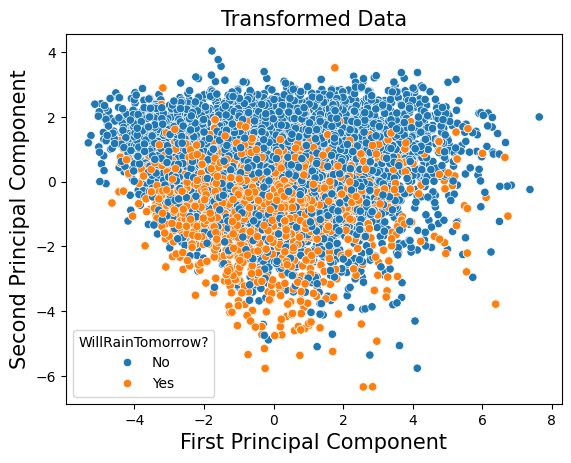

In [16]:
# write your code here

pca = PCA(n_components = 2, random_state = 10)  

# fit the PCA and transform the standardized data
pca_2 = pca.fit_transform(scaled_df)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

# plot a scatterplot to visualize the dataset
# pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# pass the dataframe to the parameter 'data'
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = df['WillRainTomorrow?'])
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)
plt.show()

In [17]:
df_pca_2['WillRainTomorrow?'] = df['WillRainTomorrow?']

df_pca_2.head()

,PC1,PC2,WillRainTomorrow?
0,-1.193577,0.344281,No
1,-0.417268,2.300435,No
2,-1.374390,0.522208,Yes
3,-0.166105,-1.620767,No
4,0.528825,2.208708,No


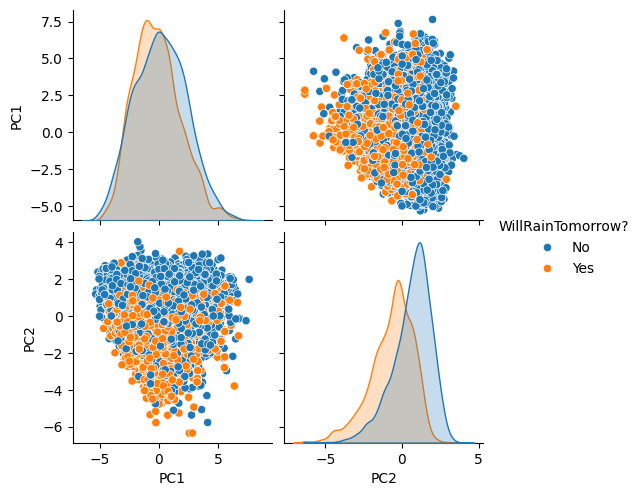

In [18]:
sns.pairplot(data=df_pca_2, hue='WillRainTomorrow?')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# write your code here

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y = df['WillRainTomorrow?']

x_train, x_test, y_train, y_test = train_test_split(scaled_df, y , test_size=0.2, random_state=10)

print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (8371, 11)
y_train: (8371,)
X_test: (2093, 11)
y_test: (2093,)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# write your code here

pca = PCA(n_components=3, random_state=10)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print('Train set:', x_train_pca.shape)
print('Test set:', x_test_pca.shape)

Train set: (8371, 3)
Test set: (2093, 3)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# write your code here

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


def randomforest_model(X_train, X_test, Y_train, Y_test):
    rf = RandomForestClassifier(random_state=1)
    
    rf.fit(X_train, Y_train)
    
    y_pred = rf.predict(X_test)
    
    test_acc = accuracy_score(Y_test, y_pred)
    
    return print('test acc', test_acc)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# write your code here

<a id="lda"> </a>
## 3. Linear Discriminant Analysis (LDA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Project the train and test sets (data without PCA transformation) onto the 1-dimensional vector that maximizes the separation between the classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Run the random forest classifier on the LDA transformed data and find the model accuracy on the test set. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Which of the above methods is more efficient in reducing the dimension of the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# write your code here